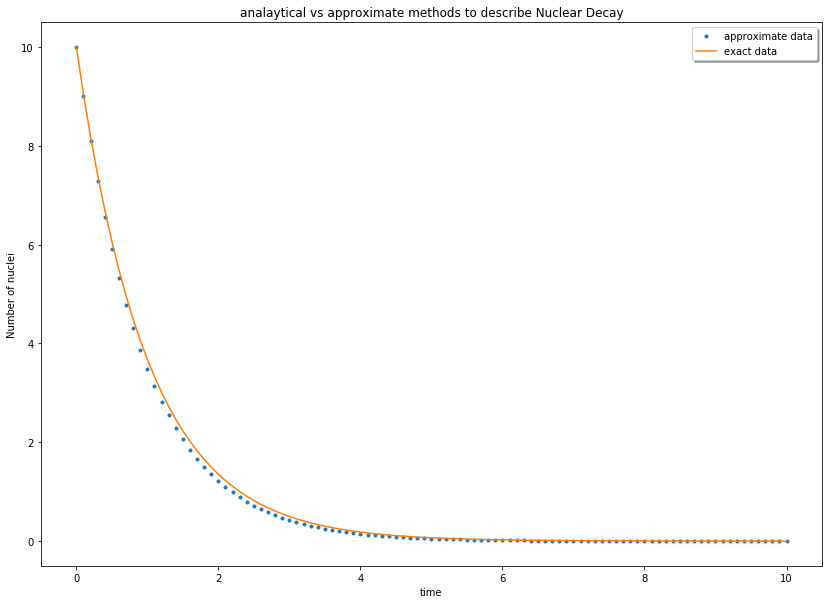

In [95]:
from math import exp
from numpy import array
import matplotlib.pyplot as plt

%matplotlib inline

Range=100
lamda=1
initPop=10
tDelta=.1

def Nanalytical(lamda, initPop,t):
    '''Calculates the number of nuclei at a given time t.
    The arguments are time and returns the value of N(number of nuclei)'''
    return initPop*exp(-lamda*t)




def Napprox(lamda, initPop,tDelta ):
    N1=initPop
    approx=[initPop]
    for x in range(Range):
        Nnew= N1-lamda*N1*(tDelta)
        approx.append(Nnew)
        N1=Nnew
        if N1<0: 
            approx.append(0)
        
    return array(approx, float)
    

def time(tDelta):
    t=0
    timelist=[0]
    for x in range(Range):
        t += tDelta
        timelist.append(t)
    return array(timelist,float)
    #print(time)   
    

approx = Napprox(lamda,initPop,tDelta)
t = time(tDelta)


Nexact=[]
for x in t:
    N=Nanalytical(lamda,initPop,x)
    Nexact.append(N)


    
    
#plotting
plt.figure(figsize=(14, 10))

plt.plot(t,approx,".", label= "approximate data")
plt.plot(t,Nexact, label="exact data")

plt.ylabel("Number of nuclei")
plt.xlabel("time")
plt.title("analaytical vs approximate methods to describe Nuclear Decay")

legend = plt.legend(loc='upper right', shadow=True)
plt.show()

Overall: The two datasets are very close. the approximate starts to vary in the middle where the curve is the sharpest, but gets better as it gets closer to zero. 

Lamda:As lamda gets smaller, the fit becomes better, as it gets bigger fit becomes worse. 

delta t: fit becomes better as delta t becomes somaller

initPop: does not affect the fit


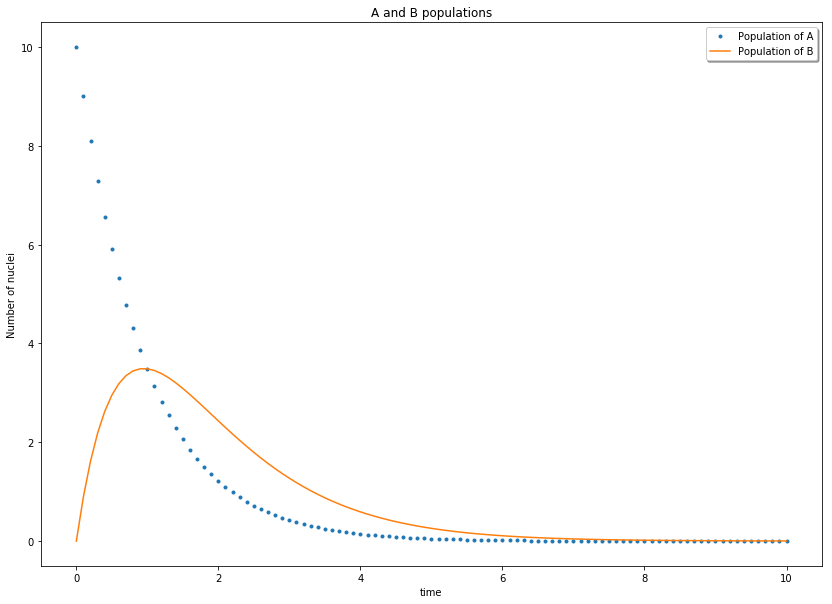

In [113]:
from math import exp
from numpy import array
import matplotlib.pyplot as plt

%matplotlib inline

Range=100
lamdaA=1
lamdaB=1
initPopA=10
initPopB=0
tDelta=.1


def NAanalytical(lamdaA, initPopA,t):
    '''Calculates the number of nuclei at a given time t.
    The arguments are time and returns the value of N(number of nuclei)'''
    return initPop*exp(-lamda*t)

#def NBanalytical(lamdaA,lamdaB,initPopB,)

def Napprox(lamdaA,lamdaB,initPopA,initPopB,tDelta ):
    NA1=initPopA
    Aapprox=[initPopA]   
    NB1=initPopB
    Bapprox=[initPopB]
    for x in range(Range):
        NAnew= NA1-lamdaA*NA1*(tDelta)
        Aapprox.append(NAnew)
        NA1=NAnew
        NBnew= (lamdaA*NA1 - lamdaB*NB1)*tDelta + NB1
        Bapprox.append(NBnew)
        NB1=NBnew
          #  if NB1<0: 
           #     Bapprox.append(0)
    return array(Aapprox, float), array(Bapprox,float)

A,B=Napprox(lamdaA,lamdaB,initPop,initPopB,tDelta )


def time(tDelta):
    t=0
    timelist=[0]
    for x in range(Range):
        t += tDelta
        timelist.append(t)
    return array(timelist,float)
    #print(time)   
t = time(tDelta)


#plotting
plt.figure(figsize=(14, 10))

plt.plot(t,A,".", label= "Population of A")
plt.plot(t,B, label="Population of B")

plt.ylabel("Number of nuclei")
plt.xlabel("time")
plt.title("A and B populations")

legend = plt.legend(loc='upper right', shadow=True)
plt.show()
